# Cell group/type specific and interacting cis-eQTL

## 1: Exploratory and prepare BED files

In [1]:
library(data.table)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("~/project-gandalm/isoform_twas/eqtl_new/")

In [3]:
load("data/deconv/bmind_deconv_tmmcpm.RData")

In [4]:
ls()

[1] "deconvexp" "frac"      "meta"

In [5]:
length(deconvexp)
dim(frac)
dim(meta)

[1] 90616374

[1] 642   9

[1] 642   9

In [6]:
head(frac)

,End,Ex,In,IP,Mic,OPC,Per,Pg,RG
1474,0.007769616,0.6876736,0.09431819,0.06798413,0.0000000000,0.010432125,0.002019240,0.06350467,0.06629843
1496,0.009077879,0.6950991,0.10125311,0.05952938,0.0021228545,0.013308218,0.002546137,0.05449788,0.06256546
1500,0.007718164,0.6893689,0.09769822,0.06675215,0.0005010374,0.011844901,0.002159362,0.06084511,0.06311216
1502,0.007801555,0.6962789,0.09777313,0.06240760,0.0017860392,0.014279430,0.002430780,0.05673580,0.06050679
1507,0.011033316,0.6992567,0.08793015,0.06379267,0.0024203646,0.014732487,0.002166183,0.05740874,0.06125936
1511,0.008174993,0.6922623,0.08627198,0.07081190,0.0000000000,0.007766166,0.001937926,0.06611211,0.06666260


In [7]:
head(meta)

,X,id,Subject,Age,Sex,inferSex,PCW,subject,study
,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>
1,1,X1474,1474,-0.4986301,M,M,14,1474,walker
2,2,X1496,1496,-0.4602740,F,F,16,1496,walker
3,3,X1500,1500,-0.4794521,M,M,15,1500,walker
4,4,X1502,1502,-0.4410959,M,M,17,1502,walker
5,5,X1507,1507,-0.4602740,M,M,16,1507,walker
6,6,X1511,1511,-0.4986301,NA,M,14,1511,walker


In [8]:
dim(deconvexp)

[1] 15683     9   642

In [4]:
head(deconvexp[,1,])

,1474,1496,1500,1502,1507,1511,1513,1525,1531,1533,⋯,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
DPM1,4.8377975,4.8109010,4.7890561,4.7754193,4.752293,4.8460666,4.8031746,4.7913932,4.8361679,4.7378061,⋯,4.8214712,4.8137773,4.8247233,4.8446226,4.8304558,4.822841,4.8103200,4.7885986,4.7907118,4.7662889
SCYL3,3.2153722,3.2243348,3.1923157,3.2019921,3.183412,3.2261413,3.1985031,3.1953454,3.2196310,3.1420406,⋯,3.2210441,3.1658952,3.2236343,3.2251834,3.1993201,3.237335,3.2096461,3.2014992,3.2190741,3.1793528
C1orf112,0.4776292,0.3896306,0.4113906,0.3618562,0.366866,0.4543647,0.3874594,0.3474632,0.3877077,0.3309372,⋯,0.3961065,0.3831377,0.3800369,0.4122188,0.3737316,0.408388,0.3817599,0.3658324,0.3751544,0.3362154
CFH,6.0954328,6.1081822,6.0756852,6.0817069,6.076075,6.1006802,6.0867877,6.0662951,6.1291895,6.0404328,⋯,6.1074941,6.0910640,6.1278254,6.0900865,6.1027710,6.114336,6.0890197,6.1005297,6.1097840,6.0942797
FUCA2,5.3744137,5.3974914,5.3597501,5.3326983,5.351002,5.3895841,5.3449846,5.3493060,5.3891063,5.3090323,⋯,5.3840984,5.3880134,5.4088376,5.3824969,5.3904690,5.396810,5.3770094,5.3805020,5.3840755,5.3884568
GCLC,4.9285835,4.9286842,4.9006352,4.9252550,4.894809,4.9573904,4.8989558,4.8904176,4.9567948,4.9092659,⋯,4.9210451,4.8671955,4.9361396,4.9227783,4.9088039,4.937043,4.9154887,4.9303630,4.9345101,4.8931751


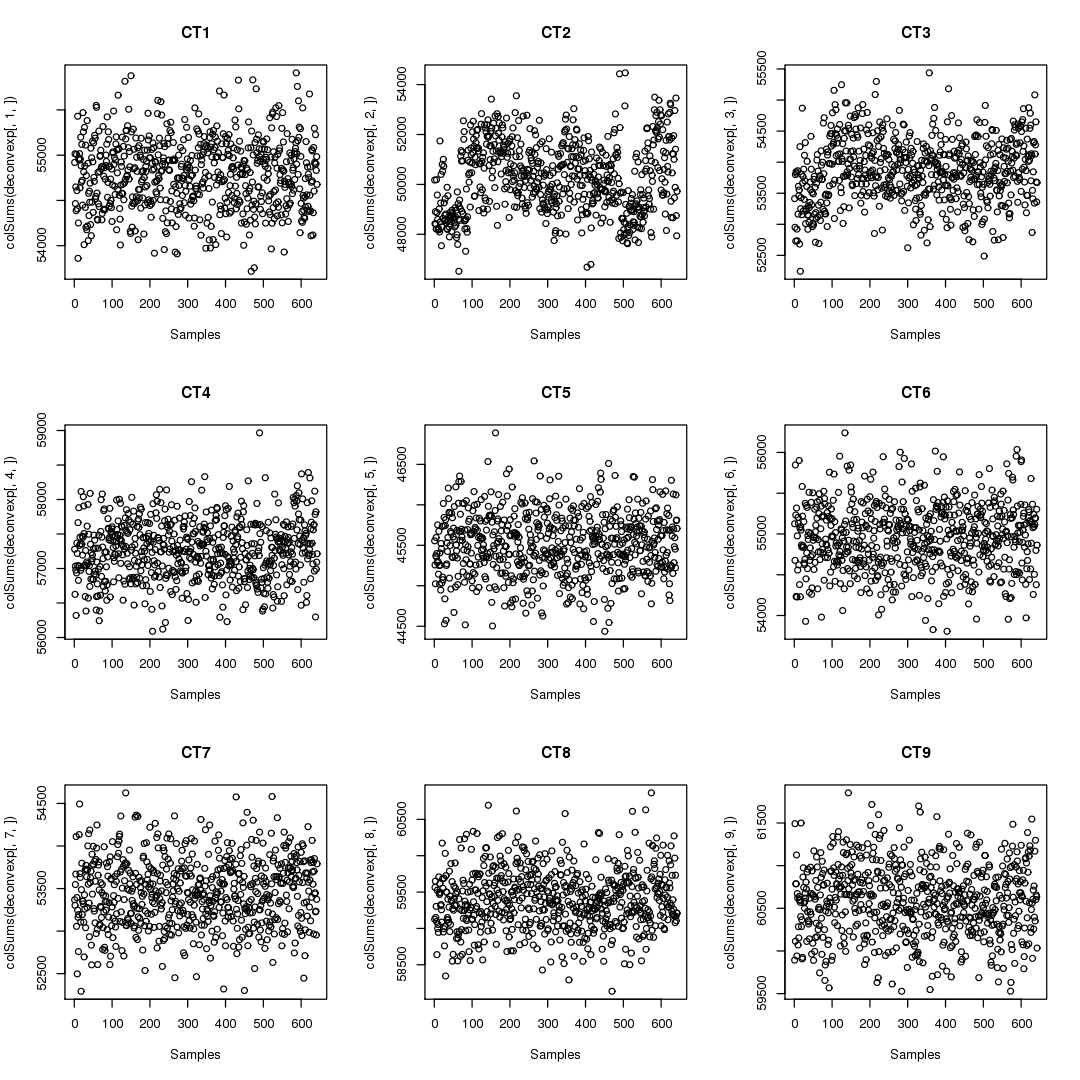

In [29]:
# bmind deconvoluted data, marker gene quantified, TMM CPM normalized, log transformed, ComBat
options(repr.plot.width=9, repr.plot.height=9)
par(mfrow=c(3,3))
plot(colSums(deconvexp[,1,]), main = "CT1", xlab= "Samples")
plot(colSums(deconvexp[,2,]), main = "CT2", xlab= "Samples")
plot(colSums(deconvexp[,3,]), main = "CT3", xlab= "Samples")
plot(colSums(deconvexp[,4,]), main = "CT4", xlab= "Samples")
plot(colSums(deconvexp[,5,]), main = "CT5", xlab= "Samples")
plot(colSums(deconvexp[,6,]), main = "CT6", xlab= "Samples")
plot(colSums(deconvexp[,7,]), main = "CT7", xlab= "Samples")
plot(colSums(deconvexp[,8,]), main = "CT8", xlab= "Samples")
plot(colSums(deconvexp[,9,]), main = "CT9", xlab= "Samples")

In [18]:
walker <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_walker.txt")
obrien <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_obrien.txt")
werling <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_werling.txt")
hdbr <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_hdbr.txt")
libd <- read.table("../genotype/all_data/isec_R2_greater_than_3/ancestry/geno_subj/geno_subj_libd.txt")

In [19]:
groups <- c()

for (i in 1:ncol(deconvexp[,1,])) {
  sample <- colnames(deconvexp[,1,])[i]
  if (sample %in% walker[,1]) {
    groups[i] <- "Walker"
  }
  if (sample %in% obrien[,1]) {
    groups[i] <- "Obrien"
  }
  if (sample %in% werling[,1]) {
    groups[i] <- "Werling"
  }
  if (sample %in% hdbr[,1]) {
    groups[i] <- "HDBR"
  }
  if (sample %in% libd[,1]) {
    groups[i] <- "LIBD"
  }
}

groups <- factor(groups)

In [22]:
s1 <- svd(deconvexp[,1,]- rowMeans(deconvexp[,1,]))
PC1_1 <- s1$d[1]*s1$v[,1]
PC2_1 <- s1$d[2]*s1$v[,2]
data_1 <- data.frame(PC1_1, PC2_1, "Data" = groups)
s2 <- svd(deconvexp[,2,]- rowMeans(deconvexp[,2,]))
PC1_2 <- s2$d[1]*s2$v[,1]
PC2_2 <- s2$d[2]*s2$v[,2]
data_2 <- data.frame(PC1_2, PC2_2, "Data" = groups)
s3 <- svd(deconvexp[,3,]- rowMeans(deconvexp[,3,]))
PC1_3 <- s3$d[1]*s3$v[,1]
PC2_3 <- s3$d[2]*s3$v[,2]
data_3 <- data.frame(PC1_3, PC2_3, "Data" = groups)

In [23]:
s4 <- svd(deconvexp[,4,]- rowMeans(deconvexp[,4,]))
PC1_4 <- s4$d[1]*s4$v[,1]
PC2_4 <- s4$d[2]*s4$v[,2]
data_4 <- data.frame(PC1_4, PC2_4, "Data" = groups)
s5 <- svd(deconvexp[,5,]- rowMeans(deconvexp[,5,]))
PC1_5 <- s5$d[1]*s5$v[,1]
PC2_5 <- s5$d[2]*s5$v[,2]
data_5 <- data.frame(PC1_5, PC2_5, "Data" = groups)
s6 <- svd(deconvexp[,6,]- rowMeans(deconvexp[,6,]))
PC1_6 <- s6$d[1]*s6$v[,1]
PC2_6 <- s6$d[2]*s6$v[,2]
data_6 <- data.frame(PC1_6, PC2_6, "Data" = groups)

In [24]:
s7 <- svd(deconvexp[,7,]- rowMeans(deconvexp[,7,]))
PC1_7 <- s7$d[1]*s7$v[,1]
PC2_7 <- s7$d[2]*s7$v[,2]
data_7 <- data.frame(PC1_7, PC2_7, "Data" = groups)
s8 <- svd(deconvexp[,8,]- rowMeans(deconvexp[,8,]))
PC1_8 <- s8$d[1]*s8$v[,1]
PC2_8 <- s8$d[2]*s8$v[,2]
data_8 <- data.frame(PC1_8, PC2_8, "Data" = groups)
s9 <- svd(deconvexp[,9,]- rowMeans(deconvexp[,9,]))
PC1_9 <- s9$d[1]*s9$v[,1]
PC2_9 <- s9$d[2]*s9$v[,2]
data_9 <- data.frame(PC1_9, PC2_9, "Data" = groups)

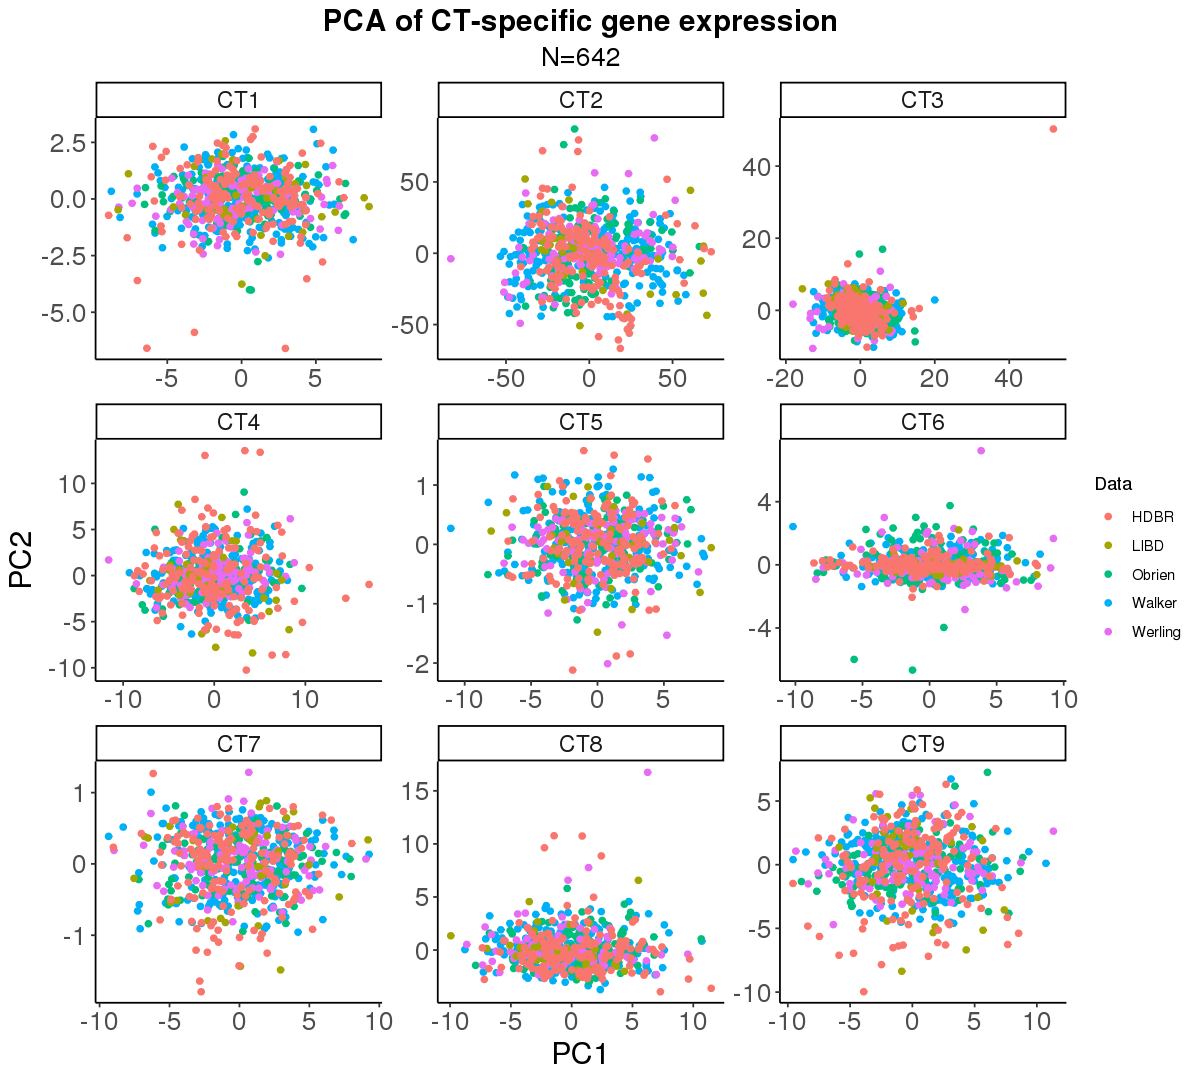

In [28]:
options(repr.plot.width=10, repr.plot.height=9)

colnames(data_1) <- colnames(data_2) <- colnames(data_3) <- colnames(data_4) <- colnames(data_5) <- colnames(data_6) <- colnames(data_7) <- colnames(data_8) <- colnames(data_9) <- c("PC1", "PC2", "Data")
data_all <- rbind(data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9)

data_all$group <- c(rep("CT1", 642), 
                    rep("CT2", 642),
                    rep("CT3", 642),
                    rep("CT4", 642),
                    rep("CT5", 642),
                    rep("CT6", 642),
                    rep("CT7", 642),
                    rep("CT8", 642),
                    rep("CT9", 642))
p <- ggplot(data_all, aes(x = PC1, y = PC2, color = Data)) +
  geom_point() +
  facet_wrap(~group, scales = "free", ncol = 3) +
  labs(x = "PC1", y = "PC2", 
       title = "PCA of CT-specific gene expression",
       subtitle = "N=642") +
  theme_classic() +
  theme(axis.text = element_text(size=16),
        axis.title = element_text(size=18),
        plot.title = element_text(size=18, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size=16, hjust = 0.5),
        strip.text.x = element_text(size=14))
p

**Generate BED files**

The 15k genes are intersection of bulk data and marker genes (Rujia), matched to gene names using gencode v19. Some gene names are not in gencode v33. To get coordinates, match gene names to ENSG

In [4]:
gencode <- fread("../salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)
match <- read.table("data/deconv/genes_bmind.csv", stringsAsFactors = F, sep = ",", header = T)

In [15]:
head(match)

,X,symbol,id,type
,<int>,<chr>,<chr>,<chr>
1,1,DPM1,ENSG00000000419,protein_coding
2,2,SCYL3,ENSG00000000457,protein_coding
3,3,C1orf112,ENSG00000000460,protein_coding
4,4,CFH,ENSG00000000971,protein_coding
5,5,FUCA2,ENSG00000001036,protein_coding
6,6,GCLC,ENSG00000001084,protein_coding


In [16]:
sum(rownames(deconvexp[,1,]) %in% gencode$V12)
sum(rownames(deconvexp[,1,]) %in% match$symbol)

[1] 15194

[1] 15683

In [5]:
genes <- data.frame("name" = rownames(deconvexp[,1,]))
head(genes)

,name
,<fct>
1,DPM1
2,SCYL3
3,C1orf112
4,CFH
5,FUCA2
6,GCLC


In [22]:
length(unique(genes$name))

[1] 15683

In [6]:
genes <- genes %>% left_join(match, by = c("name" = "symbol"))
head(genes)

,name,X,id,type
,<chr>,<int>,<chr>,<chr>
1,DPM1,1,ENSG00000000419,protein_coding
2,SCYL3,2,ENSG00000000457,protein_coding
3,C1orf112,3,ENSG00000000460,protein_coding
4,CFH,4,ENSG00000000971,protein_coding
5,FUCA2,5,ENSG00000001036,protein_coding
6,GCLC,6,ENSG00000001084,protein_coding


In [7]:
genes <- genes %>% left_join(gencode, by = c("id" = "ensg"))

In [30]:
# ENSG mapped to different gene names between gencode v19 and v33
sum(genes$name == genes$V12)

[1] 15155

In [8]:
genes <- genes %>% select(V1, V7, V4, V5, id)

In [9]:
for(i in 1:nrow(genes)) {
    if(genes[i,'V7'] == "+") {
        tss <- genes[i,'V4']
        genes[i,'V4'] <- tss - 1
        genes[i,'V5'] <- tss
    }
    if(genes[i,'V7'] == "-") {
        tss <- genes[i,'V5']
        genes[i,'V4'] <- tss - 1
        genes[i,'V5'] <- tss
    }
}

In [10]:
genes$V1 <- gsub("chr", "", genes$V1)
genes <- genes %>% select(V1, V4, V5, id)
colnames(genes) <- c("#Chr", "start", "end", "ID")

In [37]:
head(genes)

,#Chr,start,end,ID
,<chr>,<dbl>,<dbl>,<chr>
1,20,49575091,49575092,ENSG00000000419
2,1,169863407,169863408,ENSG00000000457
3,1,169631244,169631245,ENSG00000000460
4,1,196621172,196621173,ENSG00000000971
5,6,143832856,143832857,ENSG00000001036
6,6,53481767,53481768,ENSG00000001084


In [11]:
bed1 <- cbind(genes, deconvexp[,1,])

In [41]:
head(bed1)

,#Chr,start,end,ID,1474,1496,1500,1502,1507,1511,⋯,1558,1607,1707.1,1835,1851,1890,1923,2193,849,898
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DPM1,20,49575091,49575092,ENSG00000000419,4.8377975,4.8109010,4.7890561,4.7754193,4.752293,4.8460666,⋯,4.8214712,4.8137773,4.8247233,4.8446226,4.8304558,4.822841,4.8103200,4.7885986,4.7907118,4.7662889
SCYL3,1,169863407,169863408,ENSG00000000457,3.2153722,3.2243348,3.1923157,3.2019921,3.183412,3.2261413,⋯,3.2210441,3.1658952,3.2236343,3.2251834,3.1993201,3.237335,3.2096461,3.2014992,3.2190741,3.1793528
C1orf112,1,169631244,169631245,ENSG00000000460,0.4776292,0.3896306,0.4113906,0.3618562,0.366866,0.4543647,⋯,0.3961065,0.3831377,0.3800369,0.4122188,0.3737316,0.408388,0.3817599,0.3658324,0.3751544,0.3362154
CFH,1,196621172,196621173,ENSG00000000971,6.0954328,6.1081822,6.0756852,6.0817069,6.076075,6.1006802,⋯,6.1074941,6.0910640,6.1278254,6.0900865,6.1027710,6.114336,6.0890197,6.1005297,6.1097840,6.0942797
FUCA2,6,143832856,143832857,ENSG00000001036,5.3744137,5.3974914,5.3597501,5.3326983,5.351002,5.3895841,⋯,5.3840984,5.3880134,5.4088376,5.3824969,5.3904690,5.396810,5.3770094,5.3805020,5.3840755,5.3884568
GCLC,6,53481767,53481768,ENSG00000001084,4.9285835,4.9286842,4.9006352,4.9252550,4.894809,4.9573904,⋯,4.9210451,4.8671955,4.9361396,4.9227783,4.9088039,4.937043,4.9154887,4.9303630,4.9345101,4.8931751


In [12]:
bed2 <- cbind(genes, deconvexp[,2,])
bed3 <- cbind(genes, deconvexp[,3,])
bed4 <- cbind(genes, deconvexp[,4,])
bed5 <- cbind(genes, deconvexp[,5,])
bed6 <- cbind(genes, deconvexp[,6,])
bed7 <- cbind(genes, deconvexp[,7,])
bed8 <- cbind(genes, deconvexp[,8,])
bed9 <- cbind(genes, deconvexp[,9,])

In [13]:
bed1 <- bed1[order(bed1$'#Chr', bed1$'start'),]
bed2 <- bed2[order(bed2$'#Chr', bed2$'start'),]
bed3 <- bed3[order(bed3$'#Chr', bed3$'start'),]
bed4 <- bed4[order(bed4$'#Chr', bed4$'start'),]
bed5 <- bed5[order(bed5$'#Chr', bed5$'start'),]
bed6 <- bed6[order(bed6$'#Chr', bed6$'start'),]
bed7 <- bed7[order(bed7$'#Chr', bed7$'start'),]
bed8 <- bed8[order(bed8$'#Chr', bed8$'start'),]
bed9 <- bed9[order(bed9$'#Chr', bed9$'start'),]

In [ ]:
write.table(bed1, "data/deconv/end.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed2, "data/deconv/ex.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed3, "data/deconv/in.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed4, "data/deconv/ip.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed5, "data/deconv/mic.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed6, "data/deconv/opc.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed7, "data/deconv/per.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed8, "data/deconv/pg.bed", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(bed9, "data/deconv/rg.bed", col.names = T, row.names = F, sep = "\t", quote = F)

## 2: CT-specific cis-eQTL results

In [5]:
df <- data.frame('HCP' = rep(seq(10, 100, 10),9),
                 'Count' = NA,
                 'Group' = c(rep("end", 10), rep("ex", 10), rep("in", 10), rep("ip", 10),
                            rep("mic", 10), rep("opc", 10), rep("per", 10), rep("pg", 10), rep("rg", 10)))
for (i in c(1:9)) {
    for(j in seq(10, 100, 10)) {
        df[(i-1)*10+(j-10)/10+1, 'Count'] <- read.table(paste0("results/", df[(i-1)*10+(j-10)/10+1, 'Group'],
                                                               "_nominal_",j,"hcp/significant_feature_count.txt"))[,1]
    }
}

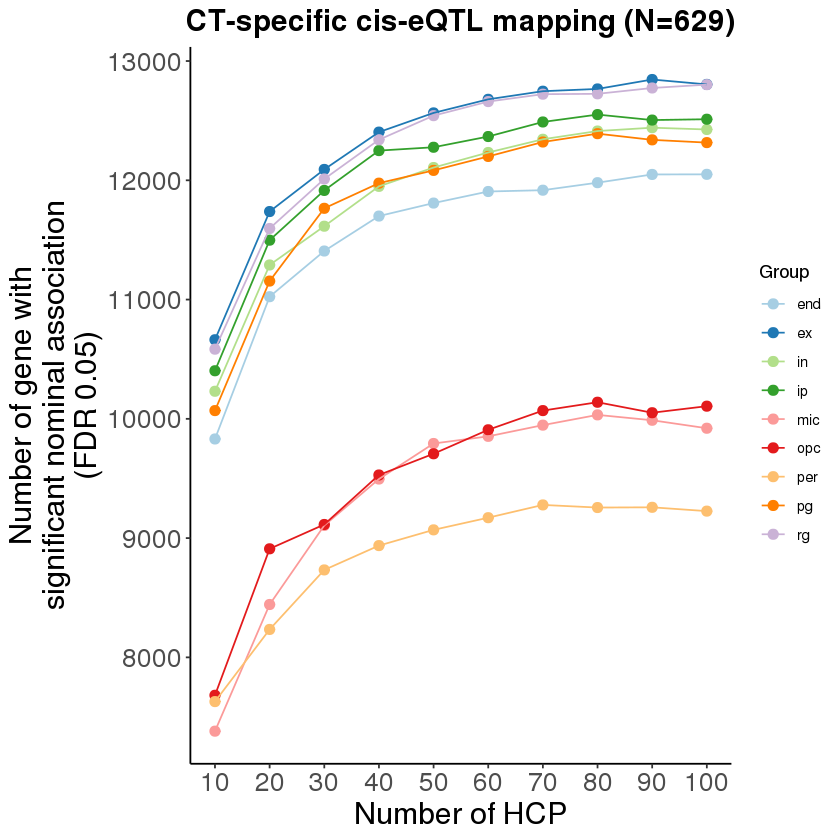

In [31]:
p <- ggplot(df) + 
    geom_point(aes(x = HCP, y = Count, color = Group), size=2.5) +
    geom_line(aes(x = HCP, y = Count, color = Group)) +
    scale_x_continuous(breaks = seq(0, 110, by = 10)) +
    labs(title = "CT-specific cis-eQTL mapping (N=629)",
         x = "Number of HCP",
         y = "Number of gene with\nsignificant nominal association\n(FDR 0.05)") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face="bold", hjust = 0.5)) +
    scale_colour_brewer(palette = "Paired")
p